In [26]:
#Import required libraries
import keras #library for neural network
import pandas as pd #loading data in table form 
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.preprocessing import normalize #machine learning algorithm library
from keras.models import Sequential 
from keras.layers import Dense,Activation,Dropout, LSTM
from keras.utils.vis_utils import plot_model
import math
from sklearn.metrics import r2_score
import yfinance as yf
from datetime import date as dt
import datetime
import pandas_ta as ta

In [27]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "NDAQ",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "4y",
        ## yyyy - mm - dd
#         start = datetime.datetime(1995,9,28),
#         end = datetime.datetime(1999,9,27),
#         start = datetime.datetime(2009,1,1),
#         end = datetime.datetime(2010,1,1),

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1d",

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2019-04-29,28.256812,28.759155,28.206578,28.712061,1884600
2019-04-30,28.708919,28.985207,28.677523,28.947533,2121600
2019-05-01,28.944391,29.299172,28.768571,28.985207,2148600
2019-05-02,29.026027,29.183008,28.878462,28.966372,2069400
2019-05-03,29.076264,29.183011,28.894163,28.922421,1262100
...,...,...,...,...,...
2023-04-21,56.340000,57.000000,56.119999,56.970001,3163900
2023-04-24,57.090000,57.209999,56.189999,56.580002,1775400
2023-04-25,56.299999,56.430000,55.209999,55.270000,2103900


In [28]:
data=data.drop(columns=['Volume'])
data

,Open,High,Low,Close
Date,,,,
2019-04-29,28.256812,28.759155,28.206578,28.712061
2019-04-30,28.708919,28.985207,28.677523,28.947533
2019-05-01,28.944391,29.299172,28.768571,28.985207
2019-05-02,29.026027,29.183008,28.878462,28.966372
2019-05-03,29.076264,29.183011,28.894163,28.922421
...,...,...,...,...
2023-04-21,56.340000,57.000000,56.119999,56.970001
2023-04-24,57.090000,57.209999,56.189999,56.580002
2023-04-25,56.299999,56.430000,55.209999,55.270000


In [29]:
# #Reading data 
step=5
## here
num_input=4
output_cluster=10 #output cluster
num_output=1 #numb of output
num_var=num_input+num_output
data.insert(num_input, "output", True)
num_line = len(data.index)

## here
col_names=list(data)[0:5]

## here
# 1st row 5th col = 5th row 4th col  
for i in range(num_line-step):
    data.iloc[i,4]=data.iloc[i+step,3]
     
for i in range(step):
#     print(data.index[num_line-(1+i)])
    temp_date = data.index[num_line-(1+i)]
    data = data.drop(temp_date)

num_line = len(data.index)
    
data_test=data
test_num_line = len(data_test.index)
data_train=data
train_num_line=len(data_train.index)
data_train

,Open,High,Low,Close,output
Date,,,,,
2019-04-29,28.256812,28.759155,28.206578,28.712061,29.113934
2019-04-30,28.708919,28.985207,28.677523,28.947533,28.539377
2019-05-01,28.944391,29.299172,28.768571,28.985207,28.567633
2019-05-02,29.026027,29.183008,28.878462,28.966372,28.621014
2019-05-03,29.076264,29.183011,28.894163,28.922421,29.044863
...,...,...,...,...,...
2023-04-14,55.500000,55.599998,54.880001,55.160000,56.970001
2023-04-17,54.869999,55.900002,54.860001,55.770000,56.580002
2023-04-18,55.730000,56.209999,55.509998,55.610001,55.27


Text(0, 0.5, 'Normal Density')

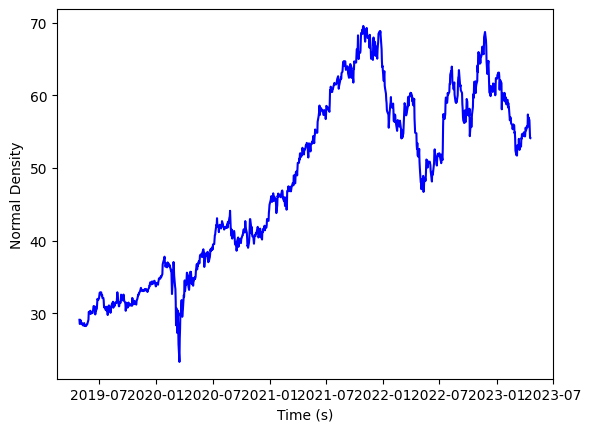

In [30]:
from matplotlib import pyplot as plt
time=[0]*len(data)
for i in range(len(data)):
    time[i]=i

plt.plot(data.index, data['output'], 'b')

plt.xlabel("Time (s)")
plt.ylabel("Normal Density")

In [32]:
learningConst = 0.0018 #float(1/train_num_line)
mlvq_lwidth=1.5
pfkp_lwidth=0.2
epsilon = 0.0005
discreteSamplePoints=50

In [33]:
def dct(nw,data,ndx):
    e1=0
    le1=0
    e2=0
    le2=0
    neighbours = 0
    iterations=0
    min1=max1=data[0]
    
    for k in range(train_num_line):
        max1=max(max1,data[k])
        min1=min(min1,data[k])
    for j in range(1,nw.num_layers):
        lyr=nw.layers[j]
        for i in range(lyr.dim):
            lyr.neus[i].value=min1+(i+0.5)/(lyr.dim)*(max1-min1)
    
    neighbours = int(nw.layers[2].dim/5);
    
    interval = ((max1-min1)/nw.layers[2].dim;);
    
    intervalTwo = ((max1-min1)/nw.layers[3].dim;);
    
    for j in range(nw.layers[1].dim):
        lyr = nw.layers[2]
        for i in range(lyr.dim):
            lyr.neus[i].wt[j]=0
    
    while(1):
        for k in range(train_num_line):
            winner1=findWinner(data[k],nw.layers[1]);
            e1+= math.fabs(data[k]-nw.layers[1].neus[winner1].value);
            nw.layers[1].neus[winner1].value *= (1-learningConst);
            nw.layers[1].neus[winner1].value += learningConst*data[k];
            
            
            lyr = nw.layers[2];
            winner2 = findWinner(data[k], lyr);
            diff = math.fabs(data[k]-lyr.neus[winner2].value);
            lyr.neus[winner2].wt[winner1] += learningConst*(1-diff/interval)
            e2 += diff;
            
            
            i=(winner2-1)
            for l in range(2,neighbours+2):
                if i>=0:
                    diff = math.fabs(data[k]-lyr.neus[i].value)
                    lyr.neus[i].wt[winner1] += learningConst/l*(1-diff/(l*interval));
                i=i-1
                
            i=(winner2+1)
            for l in range(2,neighbours+2):
                if i<lyr.dim:
                    diff = math.fabs(data[k]-lyr.neus[i].value)
                    lyr.neus[i].wt[winner1] += learningConst/l*(1-diff/(l*interval));
                i=i+1
                
            max2 = 0
            for i in range(lyr.dim):
                max2= max(max2,lyr.neus[i].wt[winner1]);
                
                
            for i in range(lyr.dim):
                lyr.neus[i].wt[winner1] = lyr.neus[i].wt[winner1]/max2
                
        iterations=iterations+1
        
        if (math.fabs(e1-le1) <= epsilon) and (math.fabs(e2-le2) <= epsilon):
            print("No. of iterations =", iterations);
            break;
        le1 = e1
        e1 = 0
        le2 = e2
        e2 = 0
     
        
    return nw

In [34]:
def mlvq(nw,data,ndx):
    e=0
    le=0
    iterations=0
    min2=0
    widthFactor=0
    interval=0
    temp=0
    min1=max1=data[0]
    
    for k in range(train_num_line):
        max1=max(max1,data[k])
        min1=min(min1,data[k])
    for j in range(1,nw.num_layers):
        lyr=nw.layers[j]
        for i in range(lyr.dim):
            lyr.neus[i].value=min1+(i+0.5)/(lyr.dim)*(max1-min1)
    
    
    while(1):
        for k in range(train_num_line):
            winner1=findWinner(data[k],nw.layers[1])
            nw.layers[1].neus[winner1].value *= (1-learningConst)
            nw.layers[1].neus[winner1].value += learningConst*data[k];
            e+= math.fabs(data[k]-nw.layers[1].neus[winner1].value)
            
        iterations=iterations+1
        
        if (math.fabs(e-le) <= epsilon):
            print("No. of iterations =", iterations);
            break;
            
        le = e
        e = 0
        
    lyr=nw.layers[1]
    for j in range(lyr.dim):
        if (j==lyr.dim-1):
            widthFactor = math.fabs(lyr.neus[j].value - lyr.neus[j-1].value)/mlvq_lwidth
        elif (j==0):
            widthFactor = math.fabs(lyr.neus[j].value - lyr.neus[j+1].value)/mlvq_lwidth
        else:
            min2=min(math.fabs(lyr.neus[j].value - lyr.neus[j-1].value), math.fabs(lyr.neus[j].value-lyr.neus[j+1].value))
            widthFactor=min2/mlvq_lwidth
        
        interval=(max1-min1)/nw.layers[2].dim
        cur=min1
        
        for i in range(nw.layers[2].dim):
            temp=0-pow(cur-lyr.neus[j].value,2)/widthFactor
            nw.layers[2].neus[i].wt[j]=math.exp(temp)
            cur += interval
            
    return nw

In [35]:
def pfkp(nw,data,ndx):
    e=0
    le=0
    iterations=0
    min2=0
    widthFactor=0
    interval=0
    temp=0
    min1=max1=data[0]
    
    for k in range(train_num_line):
        max1=max(max1,data[k])
        min1=min(min1,data[k])
    for j in range(1,nw.num_layers):
        lyr=nw.layers[j]
        for i in range(lyr.dim):
            lyr.neus[i].value=min1+(i+0.5)/(lyr.dim)*(max1-min1)
    
    alpha=[0]*nw.layers[1].dim
    beta=[0]*nw.layers[1].dim
    sigma=[0]*nw.layers[1].dim
    tau=[0]*nw.layers[1].dim
    phi=[0]*nw.layers[1].dim
    
    
    while(1):
        for k in range(train_num_line):
            winner1=findWinner(data[k],nw.layers[1])
            nw.layers[1].neus[winner1].value *= (1-learningConst)
            nw.layers[1].neus[winner1].value += learningConst*data[k];
            e+= math.fabs(data[k]-nw.layers[1].neus[winner1].value)
            
        iterations=iterations+1
        
        if (math.fabs(e-le) <= epsilon):
            print("No. of iterations =", iterations);
            break;
            
        le = e
        e = 0
        
    le = 0 
    e = 0
    lyr = nw.layers[1]
    for j in range(lyr.dim):
        phi[j] = alpha[j] = beta[j] = sigma[j] = tau[j] = lyr.neus[j].value;
        
    for k in range(train_num_line):
        winner= findWinner(data[k], nw.layers[1])
        phi[winner] *= (1-pfkp_lwidth);
        phi[winner] += pfkp_lwidth*data[k];
        if(winner):
            alpha[winner]=sigma[winner-1]
        else:
            alpha[winner] = min(alpha[winner],data[k])
        beta[winner]= min(beta[winner],phi[winner])
        sigma[winner]= max(sigma[winner],phi[winner])
        if(winner == nw.layers[1].dim - 1):
            tau[winner]= max(tau[winner],data[k])
        else:
            tau[winner] = beta[winner+1]
            
    lyr=nw.layers[2]
    for j in range(nw.layers[1].dim):
        for i in range(lyr.dim):
            if(lyr.neus[i].value <= alpha[j] or lyr.neus[i].value >=tau[j]):
                lyr.neus[i].wt[j]=0
            elif(lyr.neus[i].value < beta[j]):
                slope = 1/(beta[j]-alpha[j])
                lyr.neus[i].wt[j] = slope * (lyr.neus[i].value - alpha[j])
            elif(lyr.neus[i].value >= beta[j] and lyr.neus[i].value <=sigma[j]):
                lyr.neus[i].wt[j]=1
            else: 
                slope = 1/(sigma[j]-tau[j])
                lyr.neus[i].wt[j]= slope * (lyr.neus[i].value - tau[j]) 
            
    return nw

In [36]:
def buildConnections(source, dest, start, step, size): #layer2->layer3, 0-3
    i=k=st=start
    for i in range(dest.dim):
        currneu=dest.neus[i]
        #newneu=[None]*8
        newneu=[neuron]*(output_cluster+1)
        newwt=[0]*(output_cluster+1)
        for k in range(currneu.num_inputs):
            newneu[k] = currneu.input[k]
            newwt[k] = currneu.wt[k]
        currneu.input=newneu
        currneu.wt = newwt
        k=st
        for k in range(st+size):
            currneu.input[currneu.num_inputs]=source.neus[k]
            currneu.wt[currneu.num_inputs]=0
            currneu.num_inputs+=currneu.num_inputs
        st+=step
    return

In [37]:
import csv
def printCluster(nw,ndx):
        
    f = open("cluster_dct.txt", "a")
    f.write(" ")
    f.write(str(nw.layers[2].dim))
    f.write("\n ")
    
    if ndx == 0:
        with open('cluster_dct.csv', 'w', newline='') as csvfile:
            spamwriter = csv.writer(csvfile, delimiter=' ')
            
            fd = open("mf_dct.txt", "a")
            print(nw.layers[2].dim)
            val=[]*nw.layers[2].dim
            for j in range(nw.layers[2].dim):
                val.append(round(nw.layers[2].neus[j].value,6))
                f.write(str(val[j]))
                f.write(" ")
                fd.write(str(val[j]))
                fd.write("\n")
            f.write("\n ")
            spamwriter.writerow(str(val))

            i=0
            wt=[0]*nw.layers[1].dim*nw.layers[2].dim
            for j in range(nw.layers[1].dim):
                for k in range(nw.layers[2].dim):
                    wt[i]=nw.layers[2].neus[k].wt[j]
                    f.write(str(round(wt[i],6)))
                    f.write(" ")
                    fd.write(str(round(wt[i],6)))
                    fd.write("\n")
                    i=i+1
                f.write("\n ")
            f.close()   
            fd.close()
            spamwriter.writerow(str(wt))
        
    else:
        with open('cluster_dct.csv', 'a', newline='') as csvfile:
            spamwriter = csv.writer(csvfile, delimiter=' ')
        
            fd = open("mf_dct.txt", "a")
            print(nw.layers[2].dim)
            val=[]*nw.layers[2].dim
            for j in range(nw.layers[2].dim):
                val.append(round(nw.layers[2].neus[j].value,6))
                f.write(str(val[j]))
                f.write(" ")
                fd.write(str(val[j]))
                fd.write("\n")
            f.write("\n ")
            spamwriter.writerow(str(val))

            i=0
            wt=[0]*nw.layers[1].dim*nw.layers[2].dim
            for j in range(nw.layers[1].dim):
                for k in range(nw.layers[2].dim):
                    wt[i]=nw.layers[2].neus[k].wt[j]
                    f.write(str(round(wt[i],6)))
                    f.write(" ")
                    fd.write(str(round(wt[i],6)))
                    fd.write("\n")
            for j in range(nw,layers[3].dim):
                val.append(round(nw.layers[2].neus[j].value,6))
                f.write(str(val[i]))
                    i=i+1
                f.write("\n ")
            f.close()   
            fd.close()
            spamwriter.writerow(str(wt))

    return

In [38]:
def findWinner(value,lyr):
    winner=0
    error=math.fabs(value-lyr.neus[0].value)
    for i in range(1,lyr.dim):
        temp=min(error, math.fabs(value-lyr.neus[i].value))
        if temp<error:
            error=temp
            winner=i
    return winner

In [39]:
#return network 
def initNN(ndx):
    x=[]
    nw=network(3)
    cent_lyr=output_cluster
    
#########################  LAYER 1: INPUT LAYER  #############################
    layer1=layer(1,0,x) #numofneurons, not ipneu, data
    nw.addLayers(0,layer1) #(layernum, layer)
    
#######################  LAYER 2: CENTROID LAYER  #############################
    layer2=layer(cent_lyr,0,x) 
    nw.addLayers(1,layer2)
#   for i in range(1):
    buildConnections(layer1,layer2,0,0,1)
    
#######################  LAYER 3: MEMBERSHIP LAYER  #############################
    layer3=layer(discreteSamplePoints,0,x)
    nw.addLayers(2,layer3) 
    for i in range(cent_lyr):
        buildConnections(layer2,layer3,i,0,1)
    f = open("cluster_dct.txt", "a")
    f.write(col_names[ndx])
    f.close()
    print(col_names[ndx])
#     nw=mlvq(nw, data_train.iloc[:,ndx],ndx)
    nw=dct(nw, data_train.iloc[:,ndx],ndx)
#     nw=pfkp(nw, data_train.iloc[:,ndx],ndx)

    printCluster(nw,ndx)
    return 

In [40]:
class network():
  def __init__(self,dim):
    self.num_layers=dim
    self.layers = [layer]*dim
  def addLayers(self,i,layer):
    self.layers[i]=layer

In [41]:
class layer(network):
  def __init__(self,dim,neu,x):
    self.dim = dim
    self.neus = [neuron]*dim
    self.ipneus=[ipneuron]*dim
    self.count=0
    for i in range(dim):
        if neu == 0:
            self.neus[i]=neuron(dim)
        elif neu==1:
            self.ipneus[i]=ipneuron(dim,i,x)

In [42]:
class neuron(layer):
  def __init__(self,dim):
    self.name = None
    self.value = 0
    self.num_inputs = 0
    self.input = [neuron]*(output_cluster*num_var)
    self.wt= [0]*(output_cluster*num_var)
    self.combFunc=-1
    self.actFunc=-1
    self.activation=0
    self.ip_type=1
    self.ipneu_input = [ipneuron]
    self.actFunc_arg=[0]

In [43]:
class ipneuron(layer):
  def __init__(self,dim,count,x):
    self.numPt=discreteSamplePoints
    self.ip_value=0
    self.value=[0]*output_cluster #num_pattern
    self.name=col_names[count]
    self.mf = [[0 for i in range(discreteSamplePoints)] for j in range(output_cluster+1)]
    self.cluster=0
    for i in range(output_cluster+1):
        for j in range(discreteSamplePoints):
            self.mf[i][j]=x[(discreteSamplePoints*i)+j+(count*(discreteSamplePoints*(output_cluster+1)))]
    if(count==num_input-1):
        count=count+1
        for i in range(output_cluster+1):
            for j in range(discreteSamplePoints):
                Outmf[i][j]=x[(discreteSamplePoints*i)+j+(count*(discreteSamplePoints*(output_cluster+1)))]

In [44]:
def findWinner1(value,pt,numPt):
    winner=0
    error=math.fabs(value-pt[0])
    for i in range(1,numPt):
        temp=min(error, math.fabs(value-pt[i]))
        if temp<error:
            error=temp
            winner=i
    return winner

In [45]:
def initNN1(x):
    nw = network(6)
    nw.num_feature=num_input #input
    nw.num_pattern=output_cluster #out
    
#########################  LAYER 1: INPUT LAYER  #############################
    
    # create input layer
    lyr=layer(num_input,1,x) #dim,input neu, dataset
    nw.addLayers(0,lyr)
    
#     print("layer 1 with ",nw.layers[0].dim," neurons\n");
#     for j in range(nw.layers[0].dim):
#         print("membership function of")
#         print(nw.layers[0].ipneus[j].mf,"\n")
        
        
#     print("membership function of \n")
#     print(Outmf,"\n") 

#######################  LAYER 2: ANTECEDENT LAYER  #############################
    
    # create antecedent layer
    lyr=layer(num_input*output_cluster,0,x) #dim, not input neu, dataset
    nw.addLayers(1,lyr)
    
    # make connections between antecedent and input layers
    for i in range(num_input):
        for j in range(output_cluster):
            neu = lyr.neus[i*output_cluster+j]
            neu.ip_type=0
            neu.ipneu_input[0]=nw.layers[0].ipneus[i]
            neu.wt[0]=1.0
            neu.num_inputs=1
        
    
#######################  LAYER 3: RULE LAYER  #############################
    
    # create rule layer
    lyr=layer(pow(output_cluster,num_var),0,x) #dim, not input neu, dataset
    nw.addLayers(2,lyr)
    

##################  LAYER 4: CONSEQUENT LAYER  #############################
    
    # create output label layer
    lyr = layer(output_cluster,0,x)
    nw.addLayers(3,lyr)

##################  LAYER 5: OUTPUT POSSIBILITY LAYER  #############################
    
    # create output possibility layer
    lyr = layer(output_cluster,0,x)
    nw.addLayers(4,lyr)
    
    yagerTest(nw)
    return

In [46]:
def yagerTest(nw):
    from sklearn.metrics import r2_score
    RMSE=0
    result=[0]*test_num_line
    time=[0]*test_num_line
    ## here change value if num of input change
    train_x = (data_train.iloc[:,[0,1,2,3]]).values
    train_y = (data_train.iloc[:,[4]]).values
    test_x = (data_test.iloc[:,[0,1,2,3]]).values
    test_y = (data_test.iloc[:,[4]]).values
    global outputCluster
    #print(feature)

    ## train - rule creation
    for i in range(train_num_line):
        processRule_train(nw,train_x[i],train_y[i],i)
    inputCluster=processInput_train(nw)
    outputCluster=processOutput_train(nw)
    currentRule=processRule()
    
    ## test - process the dataset using the rules created
    for i in range(test_num_line):
        inputCluster_test=processInput_test(nw,test_x[i],test_y[i],i)
        result[i]=processOutput(inputCluster_test,outputCluster, currentRule)
    
    f = open("result_yagernetwork.txt", "w")
    
    print("\npredicted vs actual output")
    f.write("predicted vs actual output\n")
    for i in range(test_num_line):
        print(" ", '{0:.2f}'.format(result[i]),"  ",'{0:.2f}'.format(test_y[i][0]))
        f.write(str( '{0:.2f}'.format(result[i])))
        f.write("  ")
        f.write(str('{0:.2f}'.format(test_y[i][0])))
        f.write("\n")
        time[i]=i

    from matplotlib import pyplot as plt
    plt.plot(time, result, 'r-')
    plt.plot(time, test_y, 'b-')
    plt.xlabel("Time (s)")
    plt.ylabel("Normal Density")
    
    from sklearn.metrics import mean_squared_error
    rms = mean_squared_error(test_y, result)
    print("RMSE = ",rms)
    f.write("RMSE = ")
    f.write(str(rms))
    TestR2Value = r2_score(test_y,result)
    print("Testing Set R-Square=", TestR2Value)
    f.write("R-Square=")
    f.write(str(TestR2Value))
        
    return

In [47]:
def processOutput(x,outputCluster,currentRule):
    for i in range(len(currentRule)):
#         print("rule: ",currentRule[i],"&& input: ",x)
        if(currentRule[i][0]==x[0] and currentRule[i][1]==x[1] and currentRule[i][2]==x[2]):
#             print("FOUND: rule: ",currentRule[i],"&& input: ",x)
#             print("output cluster: ",currentRule[i][4])
            return outputCluster[currentRule[i][3]]
        elif(i==len(currentRule)-1):
#             print("NOT FOUND: rule: ",currentRule[i],"&& input: ",x)
            return 0

In [48]:
def processRule():
    updatedRule=[[0 for i in range(num_var+1)] for j in range(ruleCount)]
    temp=[[0 for i in range(num_var+1)] for j in range(ruleCount)]
    count=0
    
    for i in range(ruleCount):
        for j in range(num_var+1):
            updatedRule[i][j]=rules[i][j]
#     print("updated", updatedRule)
            
    for i in range(ruleCount):
        tempval=0
        tempindex=0
        for j in range(i+1,ruleCount):
            #here
            if(updatedRule[i][0]==updatedRule[j][0] and updatedRule[i][1]==updatedRule[j][1] and updatedRule[i][2]==updatedRule[j][2] and updatedRule[i][num_var]!=-1):
                if(updatedRule[i][num_var]>updatedRule[j][num_var] and updatedRule[i][num_var]>tempval):
                    tempval=updatedRule[i][num_var]
                    tempindex=i
                elif(updatedRule[j][num_var]>updatedRule[i][num_var] and updatedRule[j][num_var]>tempval):
                    tempval=updatedRule[j][num_var]
                    tempindex=j
        if(tempval!=0 and updatedRule[i][num_var]!=-1):
            temp[count]=updatedRule[tempindex]
            count=count+1
        elif(updatedRule[i][num_var]!=-1):
            temp[count]=updatedRule[i]
            count=count+1
        for j in range(ruleCount):
            updatedRule[i][num_var]=-1
            #here
            if(updatedRule[i][0]==updatedRule[j][0] and updatedRule[i][1]==updatedRule[j][1] and updatedRule[i][2]==updatedRule[j][2]):
                updatedRule[j][num_var]=-1
        
    currentRule=[[0 for i in range(num_var)] for j in range(count)]    
    for i in range(count):
        for j in range(num_var):
            currentRule[i][j]=temp[i][j]
    
#     print("temp", temp)
    print("currentRule", currentRule)
    return currentRule

In [49]:
def processInput_test(nw,x,y,count):
    value=[0]*output_cluster
    inputCluster=[0]*num_input
    
    ##find the similarity score for input value
    for i in range(num_input):
        ipneu=nw.layers[0].ipneus[i]
        ipneu.ip_value=x[i]
        mf=ipneu.mf
        winner=findWinner1(x[i],mf[0],ipneu.numPt)
        for j in range(output_cluster):
            ipneu.value[j] = mf[j+1][winner]
            fuzzytest_ltsm.iloc[count][(i*output_cluster)+j]=mf[j+1][winner]#ipneu.value[j]
            
    ##find the cluster it belongs to for the input value        
    for i in range(num_input):
        temp=0
        for j in range(output_cluster):
            if(nw.layers[0].ipneus[i].value[j]>=temp):
                nw.layers[0].ipneus[i].cluster=j
                temp=nw.layers[0].ipneus[i].value[j]

    for i in range(num_input):
        inputCluster[i]=nw.layers[0].ipneus[i].cluster
#         print("input cluster ",inputCluster[i])

    for i in range(num_input):
        print("test input: ",x[i]," cluster: ",nw.layers[0].ipneus[i].cluster) 

    ##find the similarity score for output value             
    winner=findWinner1(y[0],Outmf[0],ipneu.numPt)
    for j in range(output_cluster):
        value[j] = Outmf[j+1][winner]
    fuzzytest_ltsm.iloc[count][(num_input*output_cluster)]= y[0]

    ##find the cluster it belongs to for the output value             
    temp=0
    for j in range(output_cluster):
        if(value[j]>=temp):
            cluster=j
            temp=value[j]

    print("output cluster ",cluster) 
    
    return inputCluster

In [50]:
def processRule_train(nw,x,y,count):
    value=[0]*output_cluster
    actualValue=[0]*output_cluster
    global ruleCount
    
    ##find the similarity score for input value
    for i in range(num_input):
        ipneu=nw.layers[0].ipneus[i]
        ipneu.ip_value=x[i]
        mf=ipneu.mf
        winner=findWinner1(x[i],mf[0],ipneu.numPt)
        for j in range(output_cluster):
            ipneu.value[j] = mf[j+1][winner]
            fuzzytrain_ltsm.iloc[count][(i*output_cluster)+j]=mf[j+1][winner]#ipneu.value[j]
            
    ##find the cluster it belongs to for the input value        
    for i in range(num_input):
        temp=0
        for j in range(output_cluster):
            if(nw.layers[0].ipneus[i].value[j]>=temp):
                nw.layers[0].ipneus[i].cluster=j
                temp=nw.layers[0].ipneus[i].value[j]
                
    ##find the similarity score for output value             
    winner=findWinner1(y[0],Outmf[0],ipneu.numPt)
    for j in range(output_cluster):
        value[j] = Outmf[j+1][winner]
    fuzzytrain_ltsm.iloc[count][(num_input*output_cluster)]= y[0]
        
    ##find the cluster it belongs to for the output value             
    temp=0
    for j in range(output_cluster):
        if(value[j]>=temp):
            cluster=j
            temp=value[j]

    createNewRule=0
    ##create rules
    for i in range(ruleCount+1):
        sameClusters=0
        for j in range(num_var):
            if(j<num_input): ##check input of rule
                if (rules[i][j]==nw.layers[0].ipneus[j].cluster):
                    sameClusters+=1
            else: ##check ouput of rule
                if(rules[i][j]==cluster):
                    sameClusters+=1
        if (sameClusters==num_var):
            rules[i][num_var]+=1
            
            break
        elif (i==ruleCount):
            createNewRule=1  
    if createNewRule==1:
        for i in range(num_input):
            rules[ruleCount][i]=nw.layers[0].ipneus[i].cluster
        rules[ruleCount][num_var-1]=cluster
        rules[ruleCount][num_var]=1
        ruleCount+=1

In [51]:
def processOutput_train(nw):
    fuzzyValue=[0]*output_cluster
    
    for k in range(output_cluster):
        tempValue=0
        tempIndex=0
        for j in range(discreteSamplePoints):
            if(Outmf[k+1][j]>tempValue): 
                tempValue=Outmf[k+1][j]
                tempIndex=j+
                
    return fuzzyValue

In [52]:
def processInput_train(nw):
#     mf=[[0 for i in range(discreteSamplePoints)] for j in range(output_cluster+1)]
    fuzzyValue=[[0 for i in range((output_cluster))] for j in range(num_input)] 
    tempValue=0
    tempIndex=0
    ##find the similarity score for input value
    for i in range(num_input):
        ipneu=nw.layers[0].ipneus[i]
        mf=ipneu.mf
        for k in range(output_cluster):
            tempValue=0
            tempIndex=0
            for j in range(discreteSamplePoints):
                if(mf[k+1][j]>tempValue): 
                    tempValue=mf[k+1][j]
                    tempIndex=j
            fuzzyValue[i][k]=mf[0][tempIndex]
            tempFuzzyValue[i][m]=mf[1][fuzzyIndex]
    
    return fuzzyValue

Open
No. of iterations = 172
50
High
No. of iterations = 195
50
Low
No. of iterations = 257
50
Close
No. of iterations = 349
50
output
No. of iterations = 346
50
2750
currentRule [[0, 0, 0, 0, 0], [0, 0, 1, 0, 0], [0, 1, 1, 1, 1], [1, 0, 1, 1, 1], [1, 1, 1, 1, 1], [1, 1, 2, 1, 1], [2, 2, 2, 2, 2], [1, 2, 2, 1, 1], [0, 1, 0, 0, 1], [2, 2, 3, 3, 3], [2, 3, 3, 3, 3], [3, 3, 3, 3, 3], [3, 3, 4, 4, 3], [4, 3, 3, 3, 3], [3, 3, 2, 3, 3], [4, 4, 3, 3, 3], [4, 3, 4, 4, 4], [4, 4, 4, 4, 4], [4, 4, 5, 5, 5], [5, 4, 5, 5, 5], [5, 4, 4, 4, 5], [5, 5, 5, 5, 5], [6, 5, 5, 5, 5], [6, 5, 6, 6, 6], [6, 6, 6, 6, 6], [6, 6, 5, 5, 6], [7, 6, 7, 7, 7], [7, 7, 7, 7, 7], [7, 6, 6, 6, 6], [8, 7, 8, 7, 8], [7, 8, 8, 8, 8], [7, 7, 8, 7, 8], [8, 8, 8, 8, 8], [7, 8, 7, 8, 8], [9, 8, 9, 8, 8], [9, 8, 8, 8, 8], [8, 8, 9, 8, 8], [8, 9, 9, 8, 9], [9, 9, 9, 9, 9], [5, 6, 5, 6, 6], [7, 7, 6, 6, 5], [4, 5, 4, 5, 5], [5, 6, 6, 6, 6], [8, 7, 7, 7, 7]]
test input:  28.256812050221853  cluster:  0
test input:  28.75915489648

test input:  32.46446639142032  cluster:  1
test input:  32.46446639142032  cluster:  1
test input:  32.00159679815591  cluster:  1
test input:  32.28058624267578  cluster:  1
output cluster  0
test input:  32.51837379579475  cluster:  1
test input:  32.59129312342927  cluster:  1
test input:  31.62750482242888  cluster:  1
test input:  31.72895622253418  cluster:  1
output cluster  0
test input:  31.773340862577097  cluster:  0
test input:  31.839918119257202  cluster:  0
test input:  31.434112505897197  cluster:  1
test input:  31.497522354125977  cluster:  0
output cluster  0
test input:  31.484834633549365  cluster:  0
test input:  31.49117670610883  cluster:  0
test input:  31.0790290662546  cluster:  1
test input:  31.25657081604004  cluster:  0
output cluster  0
test input:  31.0219610647405  cluster:  0
test input:  31.053664167215896  cluster:  0
test input:  30.318139853949134  cluster:  0
test input:  30.35301399230957  cluster:  0
output cluster  0
test input:  30.286437580

test input:  34.72988071380336  cluster:  1
test input:  34.93052379341495  cluster:  1
test input:  34.54835031714909  cluster:  2
test input:  34.91459655761719  cluster:  1
output cluster  2
test input:  34.924152498309155  cluster:  1
test input:  35.12479193094184  cluster:  1
test input:  34.79039287655403  cluster:  2
test input:  35.09931564331055  cluster:  1
output cluster  2
test input:  34.75536528399236  cluster:  1
test input:  35.121611573330604  cluster:  1
test input:  34.71396175474626  cluster:  2
test input:  34.96237564086914  cluster:  1
output cluster  2
test input:  34.97829391518824  cluster:  1
test input:  35.53881233050725  cluster:  1
test input:  34.9687375738876  cluster:  2
test input:  35.3954963684082  cluster:  2
output cluster  2
test input:  35.71715827368903  cluster:  2
test input:  36.87004596283458  cluster:  2
test input:  34.956000405925444  cluster:  2
test input:  36.73310089111328  cluster:  2
output cluster  2
test input:  36.7044415115056

test input:  42.41197904363815  cluster:  3
test input:  42.50515839622029  cluster:  3
test input:  41.80792930194936  cluster:  3
test input:  41.920387268066406  cluster:  3
output cluster  3
test input:  42.138869333618295  cluster:  3
test input:  42.7493427884953  cluster:  3
test input:  41.84648378868832  cluster:  3
test input:  41.90431594848633  cluster:  3
output cluster  3
test input:  41.772584932410986  cluster:  3
test input:  42.01677579614737  cluster:  3
test input:  41.46413447622381  cluster:  3
test input:  41.859336853027344  cluster:  3
output cluster  3
test input:  41.791860310892076  cluster:  3
test input:  41.971787891231926  cluster:  3
test input:  41.35488702660523  cluster:  3
test input:  41.52518081665039  cluster:  3
output cluster  3
test input:  41.57015982744584  cluster:  3
test input:  42.02640802479347  cluster:  3
test input:  41.44806441079923  cluster:  3
test input:  41.86897277832031  cluster:  3
output cluster  3
test input:  41.862545351

test input:  46.41962572731368  cluster:  4
test input:  46.717478633600265  cluster:  4
test input:  45.810974459968634  cluster:  4
test input:  46.51351547241211  cluster:  4
output cluster  4
test input:  46.6494859741764  cluster:  4
test input:  46.74984843603487  cluster:  4
test input:  45.47102733867734  cluster:  4
test input:  45.77859115600586  cluster:  4
output cluster  4
test input:  45.74298832442509  cluster:  4
test input:  45.8206869911185  cluster:  4
test input:  45.07281833579774  cluster:  4
test input:  45.46132278442383  cluster:  4
output cluster  4
test input:  45.50017301104078  cluster:  4
test input:  46.23832700180461  cluster:  4
test input:  45.23469485324145  cluster:  4
test input:  46.069976806640625  cluster:  4
output cluster  4
test input:  46.209188314344566  cluster:  4
test input:  46.396964093294024  cluster:  4
test input:  45.4839835173419  cluster:  4
test input:  45.69118118286133  cluster:  4
output cluster  4
test input:  45.483986625053

test input:  57.53663032113607  cluster:  7
test input:  57.58877335319883  cluster:  6
test input:  57.09015677458738  cluster:  6
test input:  57.29220962524414  cluster:  6
output cluster  6
test input:  57.97332687446308  cluster:  7
test input:  57.97332687446308  cluster:  6
test input:  57.29220784007306  cluster:  7
test input:  57.367164611816406  cluster:  6
output cluster  6
test input:  57.520336693366545  cluster:  7
test input:  58.02547255691965  cluster:  6
test input:  57.337837943274295  cluster:  7
test input:  57.970069885253906  cluster:  7
output cluster  7
test input:  58.10042875951418  cluster:  7
test input:  58.142796604948074  cluster:  6
test input:  57.256361326159535  cluster:  7
test input:  57.47471237182617  cluster:  6
output cluster  7
test input:  57.70283854457506  cluster:  7
test input:  57.76475676369167  cluster:  6
test input:  57.11948627336155  cluster:  6
test input:  57.4095344543457  cluster:  6
output cluster  7
test input:  56.822929343

test input:  65.76389199645635  cluster:  9
test input:  65.85235999810246  cluster:  9
test input:  64.23693398805142  cluster:  9
test input:  64.87261962890625  cluster:  8
output cluster  9
test input:  65.9703224230861  cluster:  9
test input:  67.451403913654  cluster:  9
test input:  65.56728154187608  cluster:  9
test input:  67.35310363769531  cluster:  9
output cluster  9
test input:  67.50055941331819  cluster:  9
test input:  68.05433195898101  cluster:  9
test input:  66.99594826201626  cluster:  9
test input:  67.95602416992188  cluster:  9
output cluster  9
test input:  67.9232468905041  cluster:  9
test input:  68.04121171921214  cluster:  9
test input:  66.86486335740553  cluster:  9
test input:  66.89108276367188  cluster:  9
output cluster  9
test input:  67.56935847385876  cluster:  9
test input:  67.56935847385876  cluster:  9
test input:  66.52408466602037  cluster:  9
test input:  67.42845916748047  cluster:  9
output cluster  9
test input:  67.55953686007445  cl

test input:  50.65652370761577  cluster:  5
test input:  50.78143579480324  cluster:  5
test input:  50.20616830786053  cluster:  5
test input:  50.64665985107422  cluster:  5
output cluster  5
test input:  51.027980764455194  cluster:  5
test input:  51.524356220762606  cluster:  5
test input:  50.479013119834555  cluster:  5
test input:  50.65980911254883  cluster:  5
output cluster  4
test input:  50.248906240878775  cluster:  5
test input:  50.8866297977952  cluster:  5
test input:  50.09440257767549  cluster:  5
test input:  50.87348175048828  cluster:  5
output cluster  4
test input:  50.68611047607681  cluster:  5
test input:  51.386293849778426  cluster:  5
test input:  50.396830859996186  cluster:  5
test input:  50.59406661987305  cluster:  5
output cluster  5
test input:  50.570965991190164  cluster:  5
test input:  51.059381619756714  cluster:  5
test input:  50.330055220330685  cluster:  5
test input:  50.40925979614258  cluster:  5
output cluster  4
test input:  49.934046

test input:  66.08006108431493  cluster:  9
test input:  66.44756152838698  cluster:  9
test input:  65.49405485009467  cluster:  9
test input:  65.95094299316406  cluster:  9
output cluster  9
test input:  65.61322993487427  cluster:  9
test input:  66.66606624583454  cluster:  9
test input:  65.2358026250864  cluster:  9
test input:  65.59336853027344  cluster:  9
output cluster  9
test input:  66.25884285058156  cluster:  9
test input:  66.53694801278212  cluster:  9
test input:  64.02405948287335  cluster:  9
test input:  64.3518295288086  cluster:  8
output cluster  9
test input:  64.42135783767812  cluster:  8
test input:  65.24574643559879  cluster:  8
test input:  64.42135783767812  cluster:  9
test input:  64.91797637939453  cluster:  8
output cluster  9
test input:  64.4114140805886  cluster:  8
test input:  64.6398619111508  cluster:  8
test input:  63.626755988200486  cluster:  8
test input:  64.42134857177734  cluster:  8
output cluster  9
test input:  65.04708551274007  c


predicted vs actual output
  31.17    29.11
  31.17    28.54
  31.17    28.57
  31.17    28.62
  31.17    29.04
  31.17    28.54
  31.17    28.62
  31.17    28.50
  31.17    28.55
  31.17    28.35
  31.17    28.34
  31.17    28.66
  31.17    28.37
  31.17    28.26
  31.17    28.27
  31.17    28.25
  31.17    28.36
  31.17    28.46
  31.17    28.46
  31.17    28.48
  31.17    29.12
  31.17    30.20
  31.17    30.11
  31.17    30.19
  31.17    30.35
  31.17    29.91
  31.17    29.97
  31.17    30.11
  31.17    30.20
  31.17    30.03
  31.17    30.26
  31.17    30.45
  31.17    30.84
  31.17    31.01
  31.17    30.56
  31.17    30.92
  31.17    29.85
  31.17    30.34
  31.17    30.34
  31.17    30.65
  31.17    31.44
  31.17    32.00
  31.17    31.88
  31.17    31.82
  31.17    32.06
  31.17    32.50
  33.02    32.82
  33.02    32.90
  31.17    32.88
  33.02    32.59
  33.02    32.38
  33.02    32.54
  33.02    32.10
  33.02    32.11
  33.02    31.82
  33.02    30.99
  33.02    30.80
  3

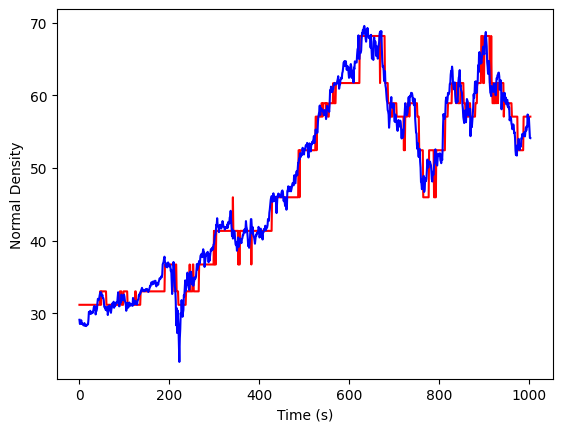

In [53]:
## here
fuzzyinput_col_names=['var1cluster1','var1cluster2','var1cluster3','var1cluster4','var1cluster5','var1cluster6','var1cluster7','var1cluster8','var1cluster9','var1cluster10',
                      'var2cluster1','var2cluster2','var2cluster3','var2cluster4','var2cluster5','var2cluster6','var2cluster7','var2cluster8','var2cluster9','var2cluster10',
                      'var3cluster1','var3cluster2','var3cluster3','var3cluster4','var3cluster5','var3cluster6','var3cluster7','var3cluster8','var3cluster9','var3cluster10',
                      'var4cluster1','var4cluster2','var4cluster3','var4cluster4','var4cluster5','var4cluster6','var4cluster7','var4cluster8','var4cluster9','var4cluster10',
                     'outputvalue']
x=[]
f = open("clusterVisuals_dct.txt", "w")
f.write(str(num_input))
f.write(str(output_cluster))
f.write("\n")
f.close()

fd = open("mf_dct.txt", "w")
fd.close()

for i in range(num_var):
    initNN(i)

with open('mf_dct.txt', 'r') as f:
    i = f.read().split()
    for elem in i:
        try:
            x.append(float(elem))
        except ValueError:
            pass
print(len(x))

ruleCount=0
rules=[[-1 for i in range(num_var+1)] for j in range(pow(output_cluster,num_var))]

Outmf = [[0 for i in range(discreteSamplePoints)] for j in range(output_cluster+1)]


# Create fuzzytrain_ltsm
temp = np.array([[0.0 for i in range(train_num_line)] for j in range(num_input*output_cluster+1)]).T
# Array to dataframe :
fuzzytrain_ltsm = pd.DataFrame(temp,columns=fuzzyinput_col_names)

# Create fuzzytest_ltsm
temp = np.array([[0.0 for i in range(test_num_line)] for j in range(num_input*output_cluster+1)]).T
# Array to dataframe :
fuzzytest_ltsm = pd.DataFrame(temp,columns=fuzzyinput_col_names)


initNN1(x)

In [54]:
outputCluster

[31.174458,
 33.02385,
 36.722635,
 41.346115,
 45.969596,
 52.442469,
 57.065949,
 58.915342,
 61.68943,
 68.162303]

In [30]:
## LTSM ##

In [55]:
trainX=[]
trainY=[]

n_future=step
n_past=10

for i in range(n_past, len(data_train.values) - n_future +1):
    trainX.append(data_train.values[i - n_past:i, 0:num_input])
    trainY.append(data_train.values[i-1:i, num_var-1])
trainX, trainY = np.array(trainX, dtype=np.float), np.array(trainY, dtype=np.float)
# trainX

C:\Users\keert\AppData\Local\Temp\ipykernel_10124\672741505.py:10: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  trainX, trainY = np.array(trainX, dtype=np.float), np.array(trainY, dtype=np.float)


In [56]:
testX=[]
testY=[]

n_future=step
n_past=10

for i in range(n_past, len(data_test.values) - n_future +1):
    testX.append(data_test.values[i - n_past:i, 0:num_input])
    testY.append(data_test.values[i-1:i, num_var-1])

testX, testY = np.array(testX, dtype=np.float), np.array(testY, dtype=np.float)
# testY

C:\Users\keert\AppData\Local\Temp\ipykernel_10124\4091248797.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  testX, testY = np.array(testX, dtype=np.float), np.array(testY, dtype=np.float)


In [57]:
model = Sequential()
# softplus- Nadam // selu - Adagrad,Adam
model.add(LSTM(200,activation='relu',input_shape=(trainX.shape[1],trainX.shape[2]),return_sequences=True))
model.add(LSTM(200,activation='relu',return_sequences=True))
model.add(LSTM(200,activation='relu',retuen_sequences=True))
model.add(LSTM(200,activation='relu',return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='Adam',loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 200)           164000    
                                                                 
 lstm_1 (LSTM)               (None, 10, 200)           320800    
                                                                 
 lstm_2 (LSTM)               (None, 200)               320800    
                                                                 
 dense (Dense)               (None, 1)                 201       
                                                                 
Total params: 805,801
Trainable params: 805,801
Non-trainable params: 0
_________________________________________________________________


In [58]:
##TRAINING DATA
history=model.fit(trainX,trainY, epochs=100, batch_size=32,validation_split=0.1,verbose=1)
forecast = model.predict(testX) #forecast

Epoch 1/100
28/28 [==============================] - 4s 42ms/step - loss: 246.0220 - val_loss: 7.8070
Epoch 2/100
28/28 [==============================] - 1s 30ms/step - loss: 8.2901 - val_loss: 6.0737
Epoch 3/100
28/28 [==============================] - 1s 29ms/step - loss: 7.2842 - val_loss: 8.7673
Epoch 4/100
28/28 [==============================] - 1s 28ms/step - loss: 6.1275 - val_loss: 10.1115
Epoch 5/100
28/28 [==============================] - 1s 30ms/step - loss: 5.9520 - val_loss: 4.4790
Epoch 6/100
28/28 [==============================] - 1s 29ms/step - loss: 5.2471 - val_loss: 18.0695
Epoch 7/100
28/28 [==============================] - 1s 28ms/step - loss: 5.7754 - val_loss: 5.6480
Epoch 8/100
28/28 [==============================] - 1s 28ms/step - loss: 4.6898 - val_loss: 8.3102
Epoch 9/100
28/28 [==============================] - 1s 29ms/step - loss: 5.6121 - val_loss: 6.8786
Epoch 10/100
28/28 [==============================] - 1s 29ms/step - loss: 5.3286 - val_loss: 3.

28/28 [==============================] - 1s 30ms/step - loss: 3.6983 - val_loss: 4.3194
Epoch 83/100
28/28 [==============================] - 1s 31ms/step - loss: 3.0895 - val_loss: 2.9904
Epoch 84/100
28/28 [==============================] - 1s 30ms/step - loss: 3.1216 - val_loss: 3.8131
Epoch 85/100
28/28 [==============================] - 1s 29ms/step - loss: 3.1908 - val_loss: 5.9806
Epoch 86/100
28/28 [==============================] - 1s 30ms/step - loss: 3.9506 - val_loss: 3.0872
Epoch 87/100
28/28 [==============================] - 1s 29ms/step - loss: 3.1402 - val_loss: 4.2134
Epoch 88/100
28/28 [==============================] - 1s 31ms/step - loss: 3.5099 - val_loss: 3.0346
Epoch 89/100
28/28 [==============================] - 1s 29ms/step - loss: 3.0280 - val_loss: 2.8815
Epoch 90/100
28/28 [==============================] - 1s 30ms/step - loss: 3.0566 - val_loss: 3.7541
Epoch 91/100
28/28 [==============================] - 1s 30ms/step - loss: 3.6971 - val_loss: 3.6202
Epo

In [59]:
time=[0]*len(forecast)
f = open("result_pure_lstm.txt", "w")
    
print("\npredicted vs actual output")
f.write("predicted vs actual output\n")
for i in range(len(forecast)):
    print(" ", '{0:.2f}'.format(forecast[i][0]),"  ",'{0:.2f}'.format(testY[i][0]))
    f.write(str( '{0:.2f}'.format(forecast[i][0])))
    f.write("  ")
    f.write(str('{0:.2f}'.format(testY[i][0])))
    f.write("\n")
    time[i]=i


predicted vs actual output
  29.82    28.35
  29.70    28.34
  29.80    28.66
  29.70    28.37
  29.70    28.26
  29.65    28.27
  29.57    28.25
  29.72    28.36
  29.66    28.46
  29.54    28.46
  29.55    28.48
  29.56    29.12
  29.54    30.20
  29.65    30.11
  29.62    30.19
  29.68    30.35
  29.94    29.91
  30.49    29.97
  30.78    30.11
  30.99    30.20
  31.14    30.03
  31.11    30.26
  30.95    30.45
  30.94    30.84
  31.00    31.01
  31.02    30.56
  31.09    30.92
  31.18    29.85
  31.43    30.34
  31.65    30.34
  31.59    30.65
  31.61    31.44
  31.30    32.00
  31.15    31.88
  31.15    31.82
  31.32    32.06
  31.75    32.50
  32.22    32.82
  32.44    32.90
  32.53    32.88
  32.62    32.59
  32.93    32.38
  33.13    32.54
  33.36    32.10
  33.47    32.11
  33.49    31.82
  33.31    30.99
  33.22    30.80
  33.07    30.94
  32.76    30.50
  32.69    30.54
  32.04    30.41
  31.66    30.81
  31.53    30.91
  31.40    29.77
  31.24    30.24
  31.21    30.33
  3

In [60]:
fuzzyvalue=[0]*len(forecast)
for i in range(len(forecast)):
    temp=0
    index=0
    for j in range(len(outputCluster)):
        if temp == 0:
            temp=abs(forecast[i]-outputCluster[j])
            index=j
        elif abs(forecast[i]-outputCluster[j]) < temp:
            temp=abs(forecast[i]-outputCluster[j])
            index=j
    if j == len(outputCluster)-1:
        fuzzyvalue[i]=outputCluster[index]


predicted vs actual output
  31.17    28.35
  31.17    28.34
  31.17    28.66
  31.17    28.37
  31.17    28.26
  31.17    28.27
  31.17    28.25
  31.17    28.36
  31.17    28.46
  31.17    28.46
  31.17    28.48
  31.17    29.12
  31.17    30.20
  31.17    30.11
  31.17    30.19
  31.17    30.35
  31.17    29.91
  31.17    29.97
  31.17    30.11
  31.17    30.20
  31.17    30.03
  31.17    30.26
  31.17    30.45
  31.17    30.84
  31.17    31.01
  31.17    30.56
  31.17    30.92
  31.17    29.85
  31.17    30.34
  31.17    30.34
  31.17    30.65
  31.17    31.44
  31.17    32.00
  31.17    31.88
  31.17    31.82
  31.17    32.06
  31.17    32.50
  33.02    32.82
  33.02    32.90
  33.02    32.88
  33.02    32.59
  33.02    32.38
  33.02    32.54
  33.02    32.10
  33.02    32.11
  33.02    31.82
  33.02    30.99
  33.02    30.80
  33.02    30.94
  33.02    30.50
  33.02    30.54
  31.17    30.41
  31.17    30.81
  31.17    30.91
  31.17    29.77
  31.17    30.24
  31.17    30.33
  3

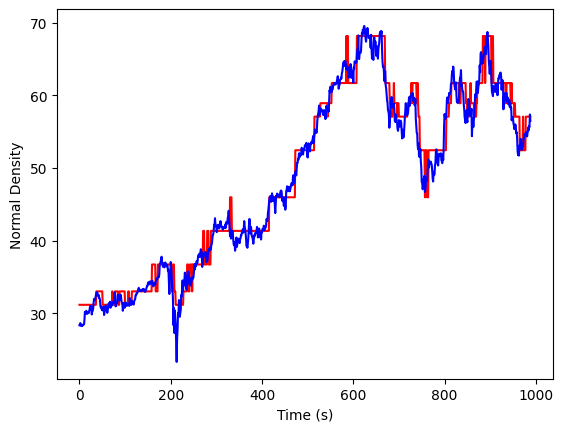

In [61]:
time=[0]*len(forecast)
f = open("result_fuzzy_lstm.txt", "w")
    
print("\npredicted vs actual output")
f.write("predicted vs actual output\n")
for i in range(len(forecast)):
    print(" ", '{0:.2f}'.format(fuzzyvalue[i]),"  ",'{0:.2f}'.format(testY[i][0]))
    f.write(str( '{0:.2f}'.format(fuzzyvalue[i])))
    f.write("  ")
    f.write(str('{0:.2f}'.format(testY[i][0])))
    f.write("\n")
    time[i]=i

from matplotlib import pyplot as plt
plt.plot(time, fuzzyvalue, 'r-')
plt.plot(time, testY, 'b-')
plt.xlabel("Time (s)")
plt.ylabel("Normal Density")
    
from sklearn.metrics import mean_squared_error
rms = mean_squared_error(testY, fuzzyvalue)
print("RMSE = ",rms)
f.write("RMSE = ")
f.write(str(rms))
TestR2Value = r2_score(testY,fuzzyvalue)
print("Testing Set R-Square=", TestR2Value)
f.write("R-Square=")
f.write(str(TestR2Value))
f.close()

In [62]:
## look ahead strategy

In [63]:
## use ga to find best look ahead period
predictedClose=fuzzyvalue
actualClose=testY
totalcash=100000
risk=0.9

In [64]:
def test(x):
    a=int(x[0])
    b=int(x[1])
    print("a: ",a," b: ",b)
    
    cash = totalcash
    leverageN=0
    leverageAmt=risk*totalcash*0.1
    tempq=0
    q=0
    
    for i in range(len(forecast)):
#         print(i)
        if i < (len(forecast))-a and i < (len(forecast))-b:

            ## buy - if LARGE
            if ((predictedClose[i+a]>predictedClose[i]) 
                and ((cash*risk)+leverageAmt)>actualClose[i]
                and ((cash*risk)
                and (cash*risk>actualClose[i])):
                tempq = (((cash*risk)+leverageAmt)/data_train['Close'][i])
                tempq = math.floor(tempq)
                cash = (cash-(tempq * data_train['Close'][i]))+leverageAmt
                q = tempq + q
                leverageN=leverageN+1
#                 print("BOUGHT")

            ## sell - if LOW
            elif ((predictedClose[i+b]<predictedClose[i]) and q!=0):
                cash = (q * actualClose[i][0]) + cash
                q = 0
#                 print("SOLD")

        if (i == len(forecast) - 1):
            leverageFee=(leverageAmt*leverageN)
            for j in range(4):
                leverageFee=(leverageFee*1.06)
            print("total assets:", cash + (q * actualClose[i][0]) - leverageFee)
            return -(cash + (q * actualClose[i][0]))

In [65]:
import numpy as np
from geneticalgorithm import geneticalgorithm as ga
varbound=np.array([[1,step],[1,step]])
vartype=np.array([['int'],['int']])

ga_model=ga(function=test,dimension=2,variable_type_mixed=vartype,variable_boundaries=varbound,function_timeout=500)

ga_model.run()

f.close()

ModuleNotFoundError: No module named 'geneticalgorithm'